This notebook will explore the structures of Medicare and Medicaid claims data using "Medicare Claims Synthetic Public Use Files" provided by the Centers of Medicare and Medicaid services.

# Data Info and Guide

### Main Data

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [344]:
benef_sum_2010=pd.read_csv("Data\Sample1\DE1_0_2010_Beneficiary_Summary_File_Sample_1.csv", dtype = object)
benef_sum_2009=pd.read_csv("Data\Sample1\DE1_0_2009_Beneficiary_Summary_File_Sample_1.csv", dtype = object)
benef_sum_2008 = pd.read_csv("Data\Sample1\DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv", dtype = object)

benef_sum_2008['SP_STATE_CODE'] = pd.to_numeric(benef_sum_2008['SP_STATE_CODE'])
benef_sum_2009['SP_STATE_CODE'] = pd.to_numeric(benef_sum_2009['SP_STATE_CODE'])
benef_sum_2010['SP_STATE_CODE'] = pd.to_numeric(benef_sum_2010['SP_STATE_CODE'])

benef_sum_2008['BENE_BIRTH_DT'] = pd.to_datetime(benef_sum_2008['BENE_BIRTH_DT'])
benef_sum_2009['BENE_BIRTH_DT'] = pd.to_datetime(benef_sum_2009['BENE_BIRTH_DT'])
benef_sum_2010['BENE_BIRTH_DT'] = pd.to_datetime(benef_sum_2010['BENE_BIRTH_DT'])

benef_sum_2008['BENE_DEATH_DT'] = pd.to_datetime(benef_sum_2008['BENE_DEATH_DT'])
benef_sum_2009['BENE_DEATH_DT'] = pd.to_datetime(benef_sum_2009['BENE_DEATH_DT'])
benef_sum_2010['BENE_DEATH_DT'] = pd.to_datetime(benef_sum_2010['BENE_DEATH_DT'])

In [345]:
pharma = pd.read_csv("Data\Sample1\DE1_0_2008_to_2010_Prescription_Drug_Events_Sample_1.csv",dtype = object)

col_list = ['QTY_DSPNSD_NUM','DAYS_SUPLY_NUM','PTNT_PAY_AMT','TOT_RX_CST_AMT']

for col in col_list:
    pharma[col] = pd.to_numeric(pharma[col])
    
pharma['SRVC_DT'] = pd.to_datetime(pharma['SRVC_DT'])

In [346]:
outpatient = pd.read_csv("Data\Sample1\DE1_0_2008_to_2010_Outpatient_Claims_Sample_1.csv", dtype = object)
inpatient = pd.read_csv("Data\Sample1\DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv", dtype = object)


### State Codes

In [347]:
state_codes = pd.read_csv("Data\CMSStatecodes.csv", dtype = object)

state_codes['Code'] = pd.to_numeric(state_codes['Code'])

state_codes.columns = ['State_Code', 'State_Name', "State_Desc"]

state_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State_Code  79 non-null     int64 
 1   State_Name  79 non-null     object
 2   State_Desc  79 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.0+ KB


### ICD 9 Diagnosis and Procedure Codes

In [348]:
ICD9_PROC_2010.columns

Index(['Procedure_Code', 'Procedure_Long', 'Procedure_Short'], dtype='object')

In [349]:
ICD9_DIAG_2010 = pd.read_csv("Data\\ICD9Codes\\2010\\V27LONG_SHORT_DX_110909Diag.csv", 
                             encoding = 'latin-1')
ICD9_DIAG_2010.columns = ['Diagnosis_Code','Diagnosis_Long','Diagnosis_Short']

ICD9_PROC_2010 = pd.read_csv("Data\\ICD9Codes\\2010\\CMS27_DESC_LONG_SHORT_SG_092709Proc.csv",
                             encoding = 'latin-1',
                             dtype = object )
ICD9_PROC_2010.columns = ['Procedure_Code','Procedure_Long','Procedure_Short']

#### Diagnosis Codes

In [350]:
print(ICD9_DIAG_2010.info())

ICD9_DIAG_2010.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14315 entries, 0 to 14314
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Diagnosis_Code   14315 non-null  object
 1   Diagnosis_Long   14315 non-null  object
 2   Diagnosis_Short  14315 non-null  object
dtypes: object(3)
memory usage: 335.6+ KB
None


,Diagnosis_Code,Diagnosis_Long,Diagnosis_Short
0,0010,Cholera due to vibrio cholerae,Cholera d/t vib cholerae
1,0011,Cholera due to vibrio cholerae el tor,Cholera d/t vib el tor
2,0019,"Cholera, unspecified",Cholera NOS
3,0020,Typhoid fever,Typhoid fever
4,0021,Paratyphoid fever A,Paratyphoid fever a


#### Procedure Codes

In [351]:
print(ICD9_PROC_2010.info())

ICD9_PROC_2010.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838 entries, 0 to 3837
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Procedure_Code   3838 non-null   object
 1   Procedure_Long   3838 non-null   object
 2   Procedure_Short  3838 non-null   object
dtypes: object(3)
memory usage: 90.1+ KB
None


,Procedure_Code,Procedure_Long,Procedure_Short
0,0001,Therapeutic ultrasound of vessels of head and ...,Ther ult head & neck ves
1,0002,Therapeutic ultrasound of heart,Ther ultrasound of heart
2,0003,Therapeutic ultrasound of peripheral vascular ...,Ther ult peripheral ves
3,0009,Other therapeutic ultrasound,Other therapeutic ultsnd
4,0010,Implantation of chemotherapeutic agent,Implant chemothera agent


## Beneficiary Summary


|#|Variable Names| Labels|
|:-|:------|------:|
|1| DESYNPUF_ID DESYNPUF:| Beneficiary Code|
|2| BENE_BIRTH_DT DESYNPUF:| Date of birth|
|3| BENE_DEATH_DT DESYNPUF:| Date of death|
|4| BENE_SEX_IDENT_CD DESYNPUF:| Sex 1= Male|
|5| BENE_RACE_CD DESYNPUF:| Beneficiary Race Code 1=White 2=Black 3=Other 5=Hispanic|
|6| BENE_ESRD_IND DESYNPUF:| End stage renal disease Indicator|
|7| SP_STATE_CODE DESYNPUF:| State Code|
|8| BENE_COUNTY_CD DESYNPUF:| County Code|
|9| BENE_HI_CVRAGE_TOT_MONS DESYNPUF:| Total number of months of part A coverage for the
beneficiary.|
|10| BENE_SMI_CVRAGE_TOT_MONS DESYNPUF:| Total number of months of part B coverage for the
beneficiary.|
|11| BENE_HMO_CVRAGE_TOT_MONS DESYNPUF:| Total number of months of HMO coverage for the
beneficiary.|
|12| PLAN_CVRG_MOS_NUM DESYNPUF:| Total number of months of part D plan coverage
for the beneficiary.|
|13| SP_ALZHDMTA DESYNPUF:| Chronic Condition: Alzheimer or related disorders
or senile|
|14| SP_CHF DESYNPUF:| Chronic Condition: Heart Failure|
|15| SP_CHRNKIDN DESYNPUF:| Chronic Condition: Chronic Kidney Disease|
|16| SP_CNCR DESYNPUF:| Chronic Condition: Cancer|
|17| SP_COPD DESYNPUF:| Chronic Condition: Chronic Obstructive
Pulmonary Disease|
|18| SP_DEPRESSN DESYNPUF:| Chronic Condition: Depression|
|19| SP_DIABETES DESYNPUF:| Chronic Condition: Diabetes|
|20| SP_ISCHMCHT DESYNPUF:| Chronic Condition: Ischemic Heart Disease|
|21| SP_OSTEOPRS DESYNPUF:| Chronic Condition: Osteoporosis|
|22| SP_RA_OA DESYNPUF:| Chronic Condition: rheumatoid arthritis and
osteoarthritis (RA/OA)|
|23| SP_STRKETIA DESYNPUF:| Chronic Condition: Stroke/transient Ischemic
Attack
|24| MEDREIMB_IP DESYNPUF:| Inpatient annual Medicare reimbursement amount|
|25| BENRES_IP DESYNPUF:| Inpatient annual beneficiary responsibility amount|
|26| PPPYMT_IP DESYNPUF:| Inpatient annual primary payer reimbursement
amount|

## Inpatient 

|#| Variable names |Labels|
|:-|:------|------------------:|
|1| DESYNPUF_ID DESYNPUF:| Beneficiary Code|
|2| CLM_ID DESYNPUF:| Claim ID|
|3| SEGMENT DESYNPUF:| Claim Line Segment|
|4| CLM_FROM_DT DESYNPUF:| Claims start date|
|5| CLM_THRU_DT DESYNPUF:| Claims end date|
|6| PRVDR_NUM DESYNPUF:| Provider Institution|
|7| CLM_PMT_AMT DESYNPUF:| Claim Payment Amount|
|8| NCH_PRMRY_PYR_CLM_PD_AMT DESYNPUF:| NCH Primary Payer Claim Paid
Amount|
|9| AT_PHYSN_NPI DESYNPUF:| Attending Physician – National
Provider Identifier Number|
|10| OP_PHYSN_NPI DESYNPUF:| Operating Physician – National
Provider Identifier Number|
|11| OT_PHYSN_NPI DESYNPUF:| Other Physician – National Provider
Identifier Number|
|12| CLM_ADMSN_DT DESYNPUF:| Inpatient admission date|
|13| ADMTNG_ICD9_DGNS_CD DESYNPUF:| Claim Admitting Diagnosis Code|
|14| CLM_PASS_THRU_PER_DIEM_AMT DESYNPUF:| Claim Pass Thru Per Diem Amount|
|15| NCH_BENE_IP_DDCTBL_AMT DESYNPUF:| NCH Beneficiary Inpatient Deductible
Amount|
|16| NCH_BENE_PTA_COINSRNC_LBLTY_AM DESYNPUF:| NCH Beneficiary Part A Coinsurance
Liability Amount|
|17| NCH_BENE_BLOOD_DDCTBL_LBLTY_AM DESYNPUF:| NCH Beneficiary Blood Deductible
Liability Amount|
|18| CLM_UTLZTN_DAY_CNT DESYNPUF:| Claim Utilization Day Count|
|19| NCH_BENE_DSCHRG_DT DESYNPUF:| Inpatient discharged date|
|20| CLM_DRG_CD DESYNPUF:| Claim Diagnosis Related Group Code|
|21-30| ICD9_DGNS_CD_1 – ICD9_DGNS_CD_10 DESYNPUF:| Claim Diagnosis Code 1 – Claim
Diagnosis Code 10|
|31-36| ICD9_PRCDR_CD_1 – ICD9_PRCDR_CD_6 DESYNPUF:| Claim Procedure Code 1 – Claim
Procedure Code 6|
|37-81| HCPCS_CD_1 – HCPCS_CD_45
DESYNPUF:| Revenue Center HCFA Common
Procedure Coding System 1 – Revenue Center HCFA
Common Procedure Coding System 45|

## Outpatient

|#| Variable names| Labels|
|:-|:-----|-----:|
|1| DESYNPUF_ID DESYNPUF:| Beneficiary Code|
|2| CLM_ID DESYNPUF:| Claim ID|
|3| SEGMENT DESYNPUF:| Claim Line Segment|
|4| CLM_FROM_DT DESYNPUF:| Claims start date|
|5| CLM_THRU_DT DESYNPUF:| Claims end date|
|6| PRVDR_NUM DESYNPUF:| Provider Institution|
|7| CLM_PMT_AMT DESYNPUF:| Claim Payment Amount|
|8| NCH_PRMRY_PYR_CLM_PD_AMT DESYNPUF:| NCH Primary Payer Claim Paid
Amount|
|9| AT_PHYSN_NPI DESYNPUF:| Attending Physician – National
Provider Identifier Number|
|10| OP_PHYSN_NPI DESYNPUF:| Operating Physician – National
Provider Identifier Number|
|11| OT_PHYSN_NPI DESYNPUF:| Other Physician – National Provider
Identifier Number|
|12| NCH_BENE_BLOOD_DDCTBL_LBLTY_AM DESYNPUF:| NCH Beneficiary Blood Deductible
Liability Amount|
|13-22| ICD9_DGNS_CD_1 – ICD9_DGNS_CD_10 DESYNPUF:| Claim Diagnosis Code 1 – Claim
Diagnosis Code 10|
|23-28| ICD9_PRCDR_CD_1 – ICD9_PRCDR_CD_6 DESYNPUF:| Claim Procedure Code 1 – Claim
Procedure Code 6|
|29| NCH_BENE_PTB_DDCTBL_AMT DESYNPUF:| NCH Beneficiary Part B Deductible
Amount|
|30| NCH_BENE_PTB_COINSRNC_AMT DESYNPUF:| NCH Beneficiary Part B Coinsurance
Amount|
|31| ADMTNG_ICD9_DGNS_CD DESYNPUF:| Claim Admitting Diagnosis Code|
|32-76| HCPCS_CD_1 – HCPCS_CD_45
DESYNPUF:| Revenue Center HCFA Common
Procedure Coding System 1 – Revenue Center
HCFA Common Procedure Coding System 45|

   ## Prescription Drug Events

|#| Variable names| Labels|
|-|:-----|-----:|
|1| DESYNPUF_ID DESYNPUF:| Beneficiary Code|
|2| PDE_ID DESYNPUF:| CCW Part D Event Number|
|3| SRVC_DT DESYNPUF:| RX Service Date|
|4| PROD_SRVC_ID DESYNPUF:| Product Service ID|
|5| QTY_DSPNSD_NUM DESYNPUF:| Quantity Dispensed|
|6| DAYS_SUPLY_NUM DESYNPUF:| Days Supply|
|7| PTNT_PAY_AMT DESYNPUF:| Patient Pay Amount|
|8| TOT_RX_CST_AMT DESYNPUF:| Gross Drug Cost|

# Practice Stats

## Prescription Drugs

### Total Prescription cost per Beneficiary

In [352]:
pharma['QTY_DSPNSD_NUM'] = pd.to_numeric(pharma['QTY_DSPNSD_NUM'])
pharma['DAYS_SUPLY_NUM'] = pd.to_numeric(pharma['DAYS_SUPLY_NUM'])
pharma['PTNT_PAY_AMT'] = pd.to_numeric(pharma['PTNT_PAY_AMT'])
pharma['TOT_RX_CST_AMT'] = pd.to_numeric(pharma['TOT_RX_CST_AMT'])

In [353]:
pharm_cost_by_user =[]
pharm_cost_by_user = pharma.groupby('DESYNPUF_ID')[['PTNT_PAY_AMT', 'TOT_RX_CST_AMT']].sum()

In [354]:
pharm_cost_by_user['Cost_Covered_Ins'] = pharm_cost_by_user['TOT_RX_CST_AMT']- pharm_cost_by_user['PTNT_PAY_AMT']
pharm_cost_by_user['Patient_Cost_Per'] = pharm_cost_by_user['PTNT_PAY_AMT']/pharm_cost_by_user['TOT_RX_CST_AMT']*100
pharm_cost_by_user['Insur_Cov_Per'] = pharm_cost_by_user['Cost_Covered_Ins']/pharm_cost_by_user['TOT_RX_CST_AMT']*100

In [355]:
pharm_cost_by_user.head()

,PTNT_PAY_AMT,TOT_RX_CST_AMT,Cost_Covered_Ins,Patient_Cost_Per,Insur_Cov_Per
DESYNPUF_ID,,,,,
00013D2EFD8E45D1,2270.0,14360.0,12090.0,15.807799,84.192201
00016F745862898F,60.0,2080.0,2020.0,2.884615,97.115385
0001FDD721E223DC,760.0,3000.0,2240.0,25.333333,74.666667
00021CA6FF03E670,30.0,670.0,640.0,4.477612,95.522388
00024B3D2352D2D0,200.0,220.0,20.0,90.909091,9.090909


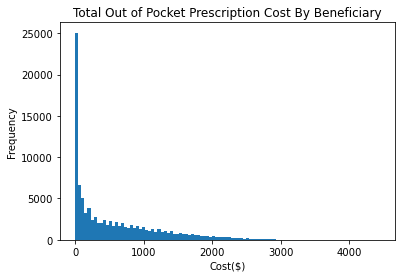

count    99538.000000
mean       575.044405
std        642.438354
min          0.000000
25%         40.000000
50%        330.000000
75%        920.000000
max       4440.000000
Name: PTNT_PAY_AMT, dtype: float64

The number of beneficiaries who paid no out of pocket prescription costs: 7513



In [356]:
plt.hist(pharm_cost_by_user['PTNT_PAY_AMT'], bins= 100)
plt.title('Total Out of Pocket Prescription Cost By Beneficiary')
plt.xlabel('Cost($)')
plt.ylabel('Frequency')
plt.show()

print(pharm_cost_by_user['PTNT_PAY_AMT'].describe())
print()
print("The number of beneficiaries who paid no out of pocket prescription costs: {}".format(
                            len(pharm_cost_by_user[pharm_cost_by_user['PTNT_PAY_AMT']==0])))
print()

In [357]:
mask = (pharm_cost_by_user['TOT_RX_CST_AMT']-pharm_cost_by_user['PTNT_PAY_AMT'])<0
overpayments = pharm_cost_by_user[mask]
print("Number of beneficiaries who overpaid for Prescriptions: {}".format(len(overpayments)))

Number of beneficiaries who overpaid for Prescriptions: 933


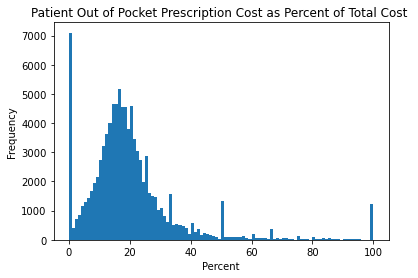

count    98143.000000
mean        20.102713
std         15.857785
min          0.000000
25%         11.929379
50%         17.475728
75%         24.000000
max        100.000000
Name: Patient_Cost_Per, dtype: float64

In [358]:
regular_payments = pharm_cost_by_user[~mask]

plt.hist(regular_payments['Patient_Cost_Per'], bins = 100)
plt.title('Patient Out of Pocket Prescription Cost as Percent of Total Cost ')
plt.ylabel('Frequency')
plt.xlabel('Percent')
plt.show()

regular_payments['Patient_Cost_Per'].describe()

## Prescription Spending by State

In [359]:
demo_2008 = benef_sum_2008[['DESYNPUF_ID', 
                            'SP_STATE_CODE',
                            'BENE_BIRTH_DT', 
                            "BENE_SEX_IDENT_CD",
                            "BENE_RACE_CD"]]



demo_2008 = demo_2008.merge(state_codes, 
                            how = 'left', 
                            left_on = 'SP_STATE_CODE',
                            right_on = "State_Code")

demo_2008.head()

,DESYNPUF_ID,SP_STATE_CODE,BENE_BIRTH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,State_Code,State_Name,State_Desc
0,00013D2EFD8E45D1,26,1923-05-01,1,1,26,Missouri,Missouri
1,00016F745862898F,39,1943-01-01,1,1,39,Pennsylvania,Pennsylvania
2,0001FDD721E223DC,39,1936-09-01,2,1,39,Pennsylvania,Pennsylvania
3,00021CA6FF03E670,6,1941-06-01,1,5,6,Colorado,Colorado
4,00024B3D2352D2D0,52,1936-08-01,1,1,52,Wisconsin,Wisconsin


In [360]:
pharma_demo = pharma.merge(demo_2008, 
                           how = 'left',
                          left_on = 'DESYNPUF_ID',
                          right_on = 'DESYNPUF_ID')

In [361]:
spending_by_state = pharma_demo.groupby('State_Name')['TOT_RX_CST_AMT'].sum()

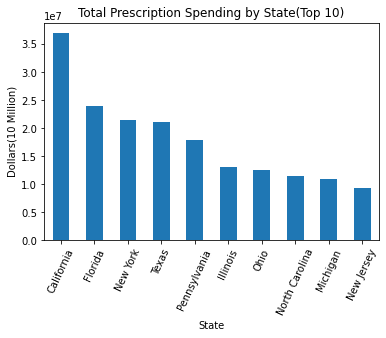

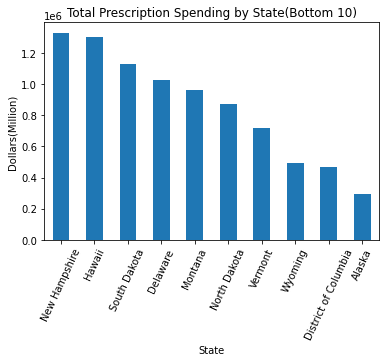

In [362]:
top_10 = spending_by_state.sort_values(ascending= False).head(10)
bottom_10 = spending_by_state.sort_values(ascending= True).head(10)

top_10.plot(kind='bar')
plt.title('Total Prescription Spending by State(Top 10)')
plt.xlabel('State')
plt.ylabel('Dollars(10 Million)')
plt.xticks(rotation=65)
plt.show()

bottom_10.sort_values(ascending=False).plot(kind ='bar')
plt.title('Total Prescription Spending by State(Bottom 10)')
plt.xlabel('State')
plt.ylabel('Dollars(Million)')
plt.xticks(rotation=65)
plt.show()

## Inpatient Visit

### Admitting Codes by Sex

In [363]:
demo_2008 = benef_sum_2008[['DESYNPUF_ID', 
                            'SP_STATE_CODE',
                            'BENE_BIRTH_DT', 
                            "BENE_SEX_IDENT_CD",
                            "BENE_RACE_CD"]]

In [364]:
admitting_diagnosis = inpatient.merge(ICD9_DIAG_2010, 
                                        how = 'left',
                                        right_on = 'Diagnosis_Code',
                                        left_on = 'ADMTNG_ICD9_DGNS_CD')

admitting_diagnosis = admitting_diagnosis.merge(demo_2008,
                                               how = 'left',
                                               on = 'DESYNPUF_ID')

In [365]:
diagnosis_by_sex = admitting_diagnosis.groupby('BENE_SEX_IDENT_CD')['Diagnosis_Long'].value_counts()
diagnosis_by_sex.groupby('BENE_SEX_IDENT_CD').nlargest(5)

BENE_SEX_IDENT_CD  BENE_SEX_IDENT_CD  Diagnosis_Long                       
1                  1                  Chest pain, unspecified                  1193
                                      Shortness of breath                      1170
                                      Pneumonia, organism unspecified          1067
                                      Congestive heart failure, unspecified     785
                                      Syncope and collapse                      736
2                  2                  Shortness of breath                      1569
                                      Chest pain, unspecified                  1504
                                      Pneumonia, organism unspecified          1296
                                      Congestive heart failure, unspecified    1044
                                      Syncope and collapse                      943
Name: Diagnosis_Long, dtype: int64

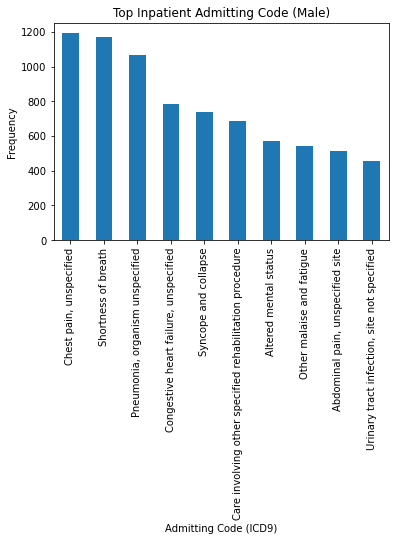

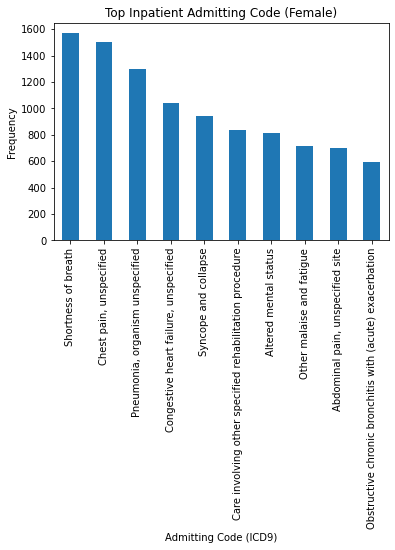

In [366]:
male_admitting_diagnosis = admitting_diagnosis[admitting_diagnosis['BENE_SEX_IDENT_CD']=='1']
female_admitting_diagnosis = admitting_diagnosis[admitting_diagnosis['BENE_SEX_IDENT_CD']=='2']

male_admitting_diagnosis['Diagnosis_Long'].value_counts().head(10).plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Admitting Code (ICD9)')
plt.title('Top Inpatient Admitting Code (Male)')
plt.show()



female_admitting_diagnosis['Diagnosis_Long'].value_counts().head(10).plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Admitting Code (ICD9)')
plt.title('Top Inpatient Admitting Code (Female)')
plt.show()

### Admitting Codes by Race

In [367]:
diagnosis_by_race = admitting_diagnosis.groupby('BENE_RACE_CD')['Diagnosis_Long'].value_counts()
diagnosis_by_race.groupby('BENE_RACE_CD').nlargest(5)

BENE_RACE_CD  BENE_RACE_CD  Diagnosis_Long                                         
1             1             Shortness of breath                                        2295
                            Chest pain, unspecified                                    2279
                            Pneumonia, organism unspecified                            1978
                            Congestive heart failure, unspecified                      1532
                            Syncope and collapse                                       1416
2             2             Shortness of breath                                         308
                            Chest pain, unspecified                                     290
                            Pneumonia, organism unspecified                             257
                            Congestive heart failure, unspecified                       198
                            Syncope and collapse                                        